# ggplot 231 - How to make a histogram

This notbook shows how to make a histogram with geom_histogram.

#### histograms can only be made of numeric variables (i.e. interval or ratio).  
For categorical variables (i.e. nominal or ordinal) we must use a barplot.   
In our examples we must make barplots of cut and color, and we must make histograms of price and carat.

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - example : histogram of diamond prices

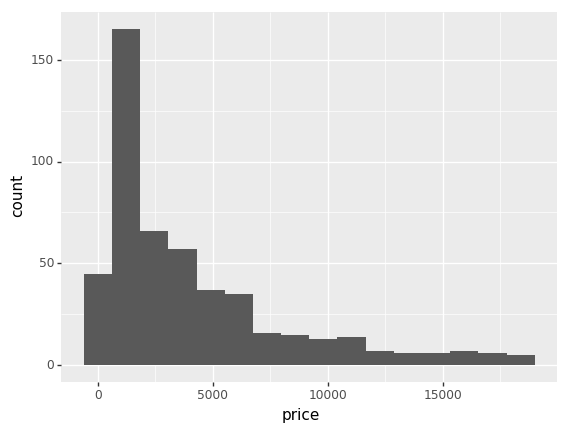

<ggplot: (-9223372036841642580)>

In [3]:
ggplot(data=dia, mapping=aes(x='price')) + \
    geom_histogram()

## bin
To understand histograms we need to know what bins are.  

All prices from -500 to +500 are punt into the first bin (note 0 is in the middle of this bin).  
All prices from +500 to +1500 are punt into the second bin (note 1000 is in the middle of this bin).    
etc.  
All prices from +4500 to +5500 are put into the fifth bin (note 5000 is in the middle of this bin).    
etc, etc.

For each bin a bar is displayed, the height of the bar shows the number of cases that fall within a bin. 

remark for purist only: strictly speaking in a [histogram](https://en.wikipedia.org/wiki/Histogram) not the height but the area of a bar represents the number of cases.  
However ggplot-bins always have the same width, so the relative height also shows the relative areas.

## controling the number of bins

There are two way to control the number of bins:
- specify that number with bins=...
- specify the bin-width with binwidth=...

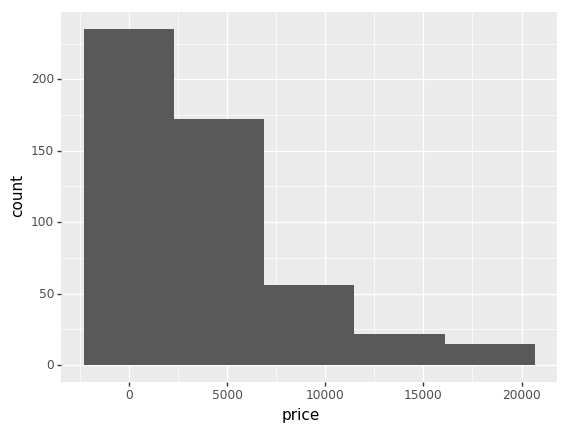

<ggplot: (-9223372036841642601)>

In [4]:
ggplot(data=dia, mapping=aes(x='price')) + \
    geom_histogram(bins=5)

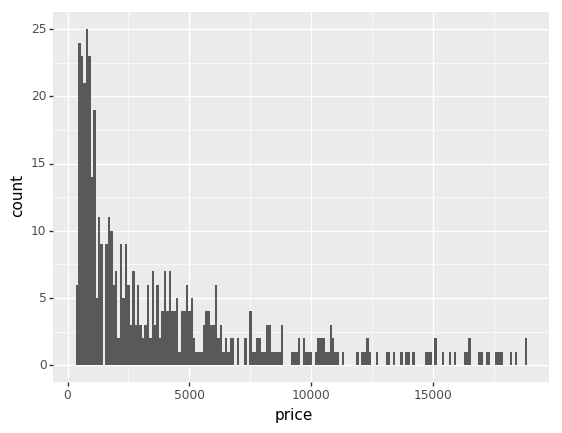

<ggplot: (13535720)>

In [5]:
ggplot(data=dia, mapping=aes(x='price')) + \
    geom_histogram(binwidth=100)

## Aesthetics

According to the [documentation](http://ggplot.yhathq.com/docs/geom_histogram.html) geom_histogram has aesthetics
- x -------- (variable to plot along the x-axis)
- alpha ---- (transparency)
- color ---- (color of the border)
- fill ----- (color of the bar)
- linetype - (either "solid", "dashed" or "dotted" - solid is the default-)
- size ----- (how thick is the boder line)
- weight --- (see section 4 below)


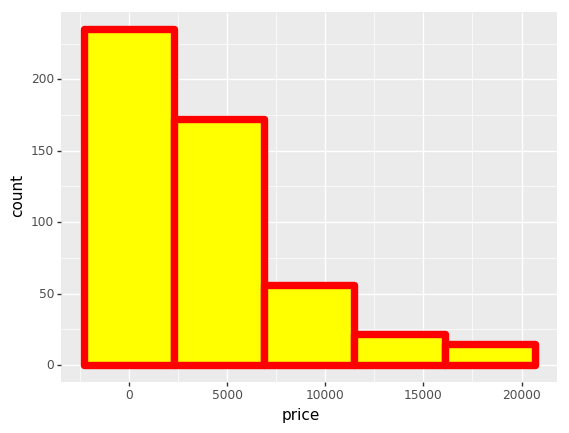

<ggplot: (13491720)>

In [6]:
ggplot(data=dia, mapping=aes(x='price')) + \
    geom_histogram(bins=5, fill='yellow', color='red', size=3)
# fill='yellow' gives yellow bars
# color='red' gives red borders around the bar
# size=3 makes the borderlines thick

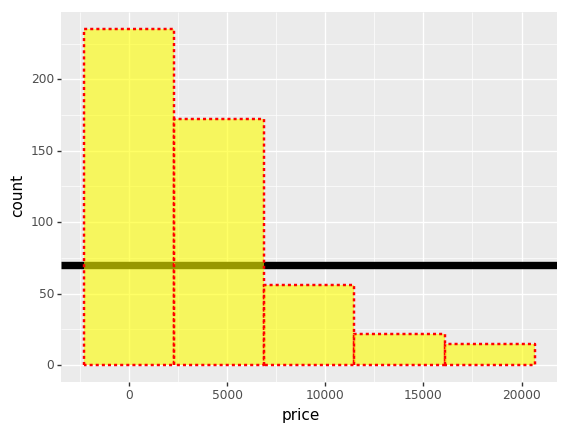

<ggplot: (-9223372036841511003)>

In [7]:
ggplot(data=dia, mapping=aes(x='price')) + \
    geom_hline(yintercept=70, size=3) + \
    geom_histogram(bins=5,fill='yellow', color='red', size=1, alpha=0.6, linetype='dotted')
# alpha = 0.6 makes the bars transparent
# linetype='dotted' makes the borders dotted

# 3 - example: histogram of price (bars broken up by diamond cut)

One way to do this is setting the color aestetic in the aes() 

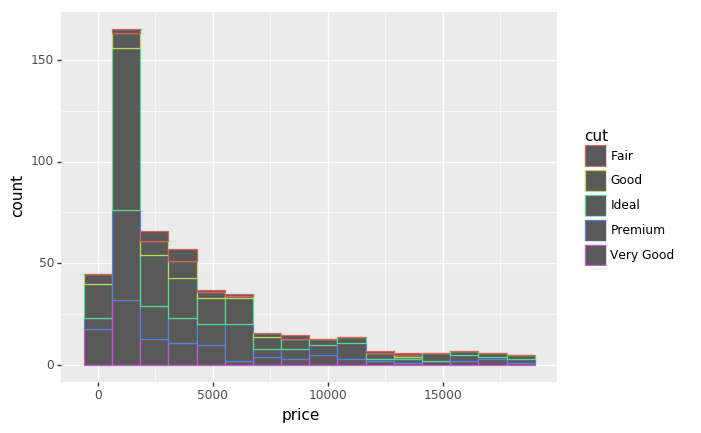

<ggplot: (13540251)>

In [8]:
ggplot(data=dia, mapping=aes( x='price', color='cut')) + \
    geom_histogram(bins=16)

This figure does the work, but is hard to read.  
When we use the fill easthetic we get a more readeble plot.

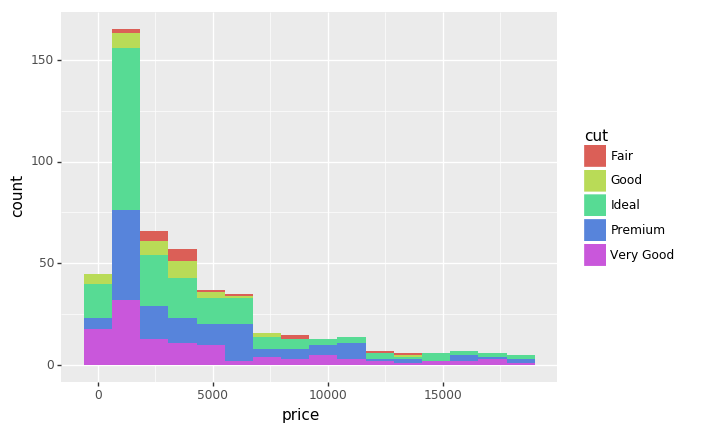

<ggplot: (-9223372036841475254)>

In [9]:
ggplot(data=dia, mapping=aes( x='price', fill='cut')) + \
    geom_histogram(bins=16)

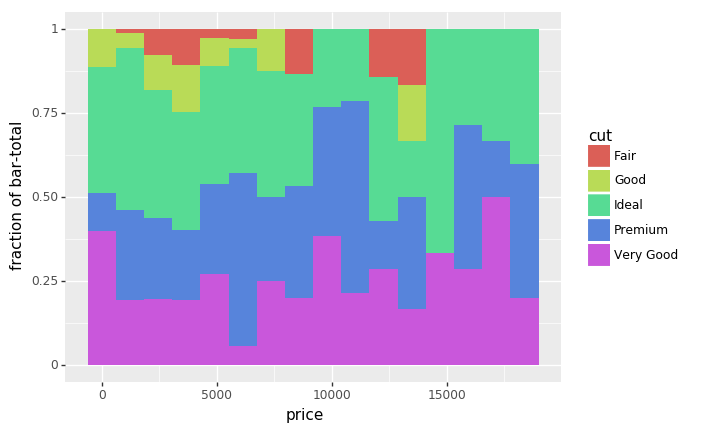

<ggplot: (13434439)>

In [10]:
ggplot(data=dia, mapping=aes( x='price', fill='cut')) + \
    geom_histogram(bins=16, position='fill') + \
    ylab('fraction of bar-total')

# 4 - example of weighing bars in barplots or histograms.

It is possible to weigh cases, e.g. diamonds that have less carats might be counted as less important than diamonds that have more carets.  
ggplot lets us weigh the price by carat.

First show the unweighted price histogram again.

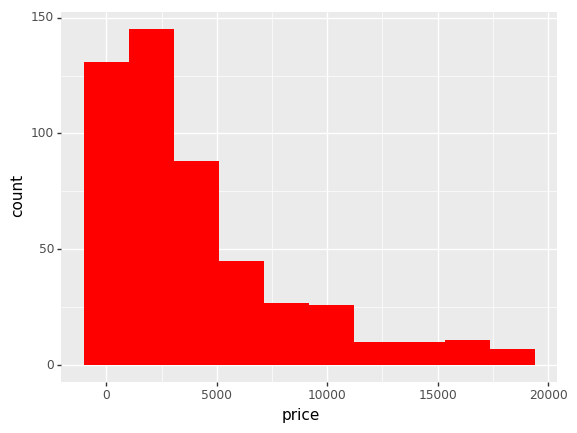

<ggplot: (-9223372036841134357)>

In [11]:
ggplot(data=dia, mapping=aes( x='price')) + \
    geom_histogram(bins=10,fill='red')

The plot below shows the same histogram, only this version is weighed by carat. 

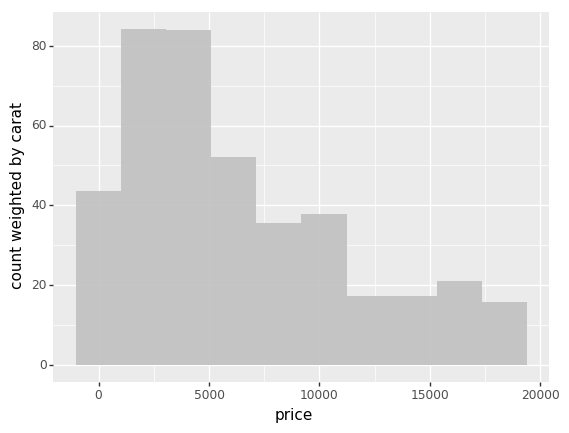

<ggplot: (13213525)>

In [12]:
ggplot(data=dia, mapping=aes( x='price', weight='carat')) + \
    geom_histogram(bins=10, fill='silver', alpha=0.9) + \
    ylab('count weighted by carat')

We can combine both plots in one figure, so that they are aesy to compare.  
Note that the second geom has its own mapping=aes()

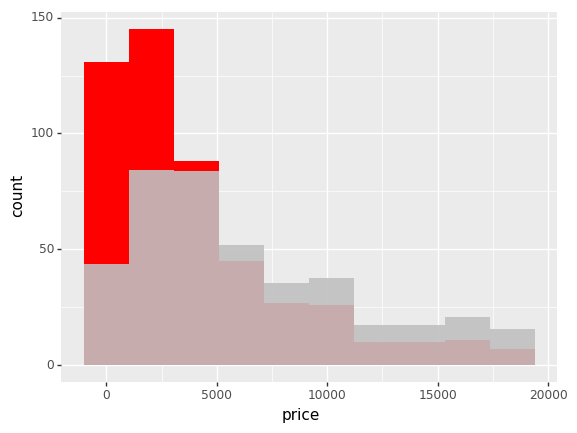

<ggplot: (-9223372036841448837)>

In [13]:
ggplot(data=dia, mapping=aes( x='price')) + \
    geom_histogram(bins=10, fill='red') + \
    geom_histogram(mapping=aes( x='price', weight='carat'), bins=10, fill='silver', alpha=0.9 )